# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5582_1&content_id=_200537_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission
*Include a short sentence summarizing each member’s contribution.*

Student's Name:
- **Ho Li Lian (1009367)**: Building Model, Model Improvements
- **Lim Zhi Tong (1008987)**: Data Collection, Cleaning Data
- **Song Joonhyung (1007154)**: Model Evaluation, Website
- **Tattiana Cai Xiaojun Binte Ithnin (1009046)**: Data Collection, Cleaning Data

### Background description of the problem
Air pollution and inadequate healthcare infrastructure are major global public health challenges, particulary in urbanizing and developing countries. Respiratory diseases due to increase exposure to pollutants, poor environemental governance, and demographic shifts in society. However, policy decisions are often reactive rather than data-driven, and many countries are inactive in utilizing tools to assess national risk levels or tailor public health interventions accordingly. 

### User Persona
**Potential users:** 
- Governments frequently operating in silos, missing opportunities to intergrate environmental, economic, demographic indicators into coherent, predictive models

**Pain points:** 
- Unaware of high-risk areas that could potentially lead residents to aquire respiratory diseases.
- Struggle to identify effective, data-driven strategies to mitigate national health risks regarding respiratory disease.

**Goals:**
- Inform national respiratory health policies with accurate, data-driven insights.
- Advocate for targeted interventions in high-risk population segments

**Needs** 
- A reliable model that can ingest standardized country data
- An intuitive visualization for presenting insights to stakeholders

### Problem Statement using “how might we ...” statement
>***How might we guide policymakers to preemptively mitigate the risk of developing respiratory disease by pinpointing critical areas of improvement?***
- Our team captured the need for an accessible, cross-disciplinary tool that synthesizes complex global datasets into actionable national-level respiratory health insights. Therefore;
- How might we guide policymakers to preemptively mitigate the risk of developing respiratory disease by pinpointing critical areas of improvement?

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

## Independent Variables (features)
|Short-form|Data|Unit|Description|Relation to Problem statement|
|---|----|----|----|---|
|***Climate and Enviorment***|
|EPI|[Environmental Performance Index](https://epi.yale.edu/epi-results/2022/component/epi)|-|Composite score evaluating environmental health and ecosystem vitality| Higher EPI may indicate stronger enviorment protections and lower exposure to carcinogens (A substance that can cause cancer)|
|AST|[Average Surface Temp](https://globaldatalab.org/geos/download/?levels=1&years=2022+2021+2020&interpolation=0&extrapolation=0)|°C|National average surface temperature (°C), which can influence pollution dispersion and lung stress| Extreme heat may intensify air pollution; temperature also influences disease spread and risk|
|***Air Quality***|
|AQI|[Air Quality Index](https://www.aqi.in/world-most-polluted-countries)|-|Measure of overall air quality of the country|Poor air quality (high AQI) directly increases respiratory illness risk, including lung cancer|
|***Socio-economic and demographic context***|
|HDI|[Human Development Index](https://hdr.undp.org/data-center/documentation-and-downloads)|-|Composite index of life expectancy, education, and income — proxy for healthcare access and quality|Higher HDI may correlate with better healthcare access, but also urbanization (mixed effect)|
|GDP|[Gross Domestic Product per capita](https://ourworldindata.org/grapher/gdp-per-capita-maddison-project-database)|$1k/capita|The total monetary or market value of all the goods and services produced within that country's borders during a specified period of time|Wealthier countries may afford better healthcare, but also have higher industrial pollution|
|PDPC|[Population Density per Capital](https://ourworldindata.org/grapher/population-density-of-the-capital-city?tab=table&time=2020..latest)|capita/capital|Number of people per square kilometer in the capital of the country|Denser populations can correlate with higher pollution, but also with better health infrastructure|
|***Healthcare***|
|OADR|[Old Age Dependency Ratio](https://ourworldindata.org/grapher/age-dependency-ratio-old?tab=table)|%|Ratio of elderly dependents to working-age population|Older populations are more vulnerable to cancer, influencing national lung cancer rates|
|SR|[Smoking Rates](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/gho-tobacco-control-monitor-current-tobaccouse-tobaccosmoking-cigarrettesmoking-agestd-tobagestdcurr)|%|Percentage of the population who are regular tobacco users|Direct and major known contributor to lung cancer|
|OOP|[Out-of-Pocket Expenditure](https://data360.worldbank.org/en/indicator/WB_WDI_SH_XPD_OOPC_CH_ZS)|%|Healthcare costs paid directly by individuals|High out-of-pocket costs may reduce access to early diagnosis/treatment, increasing mortality|
|***Lung Cancer***|
|LCR|[Lung Cancer Rate](https://worldpopulationreview.com/country-rankings/lung-cancer-rates-by-country)|Per 100k people|Reported incidence rate of lung cancer|Crude rate helps provide context but does not account for genetics — included for correlation only|
|MAJ|Assigned Majority Ancestry|-|Dominant ancestry group of the population|Used to link GWAS-derived genetic risk to countries, accounting for inherited predispositions|

## Dependent Variable (target)
|Short-form|Data|Unit|Description|
|---|----|----|----|
|LCR_OR|[Lung Cancer Rates per Odds Ratio](https://www.ebi.ac.uk/gwas/efotraits/MONDO_0008903)|-|Target variable. Risk level estimated from genetic predisposition (GWAS), adjusted by ancestry |

Our target variable, LCR_OR, represents the adjusted likelihood of developing lung cancer, considering the genetic predisposition (odds ratio) based on the majority ancestry of the country.

It’s relevant to our problem statement because we aim to identify national-level modifiable risk factors (environmental, social, health-related) that most significantly increase or decrease the likelihood of respiratory diseases like lung cancer.


### Code
> Note: Do check out our uploaded code that we submitted in the Bonus part for better legibility and readability, as we've divided the functions up into different files there! ☺️

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from typing import Optional, Any
from constants import FILE_NAME, OR_FILE_NAME, ALL_FEATURES, TARGET

In [3]:
# Loading data
df: pd.DataFrame = pd.read_csv(FILE_NAME)  # Main Dataset
or_df: pd.DataFrame = pd.read_csv(OR_FILE_NAME)  # OR Data

In [4]:
# Before any analysis/cleaning, let's separate our features and target!
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Get features and targets from dataframe
    """
    # Convert to one-element lists if provided argument is not a list
    features = feature_names if isinstance(feature_names, list) else [feature_names]
    targets = target_names if isinstance(target_names, list) else [target_names]

    # Get dataframe of the provided features & targets
    df_feature: pd.DataFrame = df[features]
    df_target: pd.DataFrame = df[targets]
    return df_feature, df_target

# ALL_FEATURES: EPI, AST, AQI, HDI, GDP, PWD_A, OADR, SR, OOP, LCR, MAJ, LCR_RAF, PDPC, CO2, HUM
# TARGET: LCR_OR
df_feature, df_target = get_features_targets(df, ALL_FEATURES, TARGET)
display(df_feature)
display(df_target)

,EPI,AST,AQI,HDI,GDP,OADR,SR,OOP,PDPC,CO2,HUM
0,47.1,13.750,40,0.810,12978.1010,23.535809,21.9,54.016439,8050.0635,1.829653,66.58
1,29.6,19.830,54,0.763,13506.4440,9.823662,21.1,28.488343,6687.6060,3.858680,43.01
2,41.1,15.600,34,0.865,18292.3180,18.426908,23.8,27.214090,6409.9746,4.299803,52.77
3,48.3,8.193,74,0.811,13837.5770,19.209538,24.9,74.352273,5313.5015,2.584923,62.41
4,60.1,19.010,21,0.958,52049.4300,26.362581,13.1,18.314137,573.0000,14.478505,60.95
...,...,...,...,...,...,...,...,...,...,...,...
129,37.4,17.010,45,0.862,20181.9400,23.793520,20.5,19.938877,5351.9730,2.321688,71.76
130,38.2,13.910,82,0.740,12559.4010,8.678559,16.7,56.994545,6346.5186,3.499594,49.26
131,20.1,24.820,60,0.766,8050.3590,12.123131,22.5,40.011318,5717.0250,3.335515,80.17
132,38.4,22.040,53,0.595,3342.4214,3.331570,14.6,65.140900,8509.6900,0.373912,58.69


,LCR_OR
0,21.411624
1,9.725887
2,16.841554
3,23.303651
4,20.396053
...,...
129,25.135384
130,6.750023
131,16.312555
132,2.582094


### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [5]:
# Clean Data
# Note that while collecting the data in the .csv, we have already dropped rows that contained too many missing values,
# as well as other cleaning steps such as removing duplicates, etc.
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Normalize the dataset -> between -1 to 1
    Formula: yhat = b0 + b1x

    Returns:
        tuple[np.ndarray, np.ndarray, np.ndarray]: normalized array, column means, column stds
    """
    assert columns_means is None or columns_means.shape == (1, array.shape[1])
    assert columns_stds is None or columns_stds.shape == (1, array.shape[1])
    
    if columns_means is None: 
        columns_means = array.mean(axis=0).reshape(1, -1) # reshape output into 1 by N array shape 
    if columns_stds is None:
        columns_stds = array.std(axis=0).reshape(1, -1)

    out: np.ndarray = (array - columns_means) / columns_stds
    
    assert out.shape == array.shape
    assert columns_means.shape == (1, array.shape[1])
    assert columns_stds.shape == (1, array.shape[1])
    return out, columns_means, columns_stds

array_features_normalized, means, stds = normalize_z(df_feature.to_numpy())


=== Analysis for EPI ===
mean: 43.48805970149253
median: 41.0
mode: 29.6
std: 13.465271648497758
vars: 181.31354056783752
range: 59.00000000000001
iqr: 19.549999999999997
Skew: Right-Skewed (positive skew)
count: 134


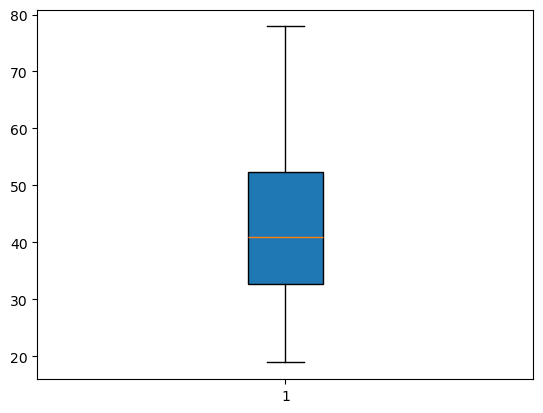


=== Analysis for AST ===
mean: 18.12951492537313
median: 19.6
mode: 13.25
std: 7.557373526070913
vars: 57.11389461255751
range: 28.25
iqr: 13.177499999999997
Skew: Approximately Symmetric
count: 134


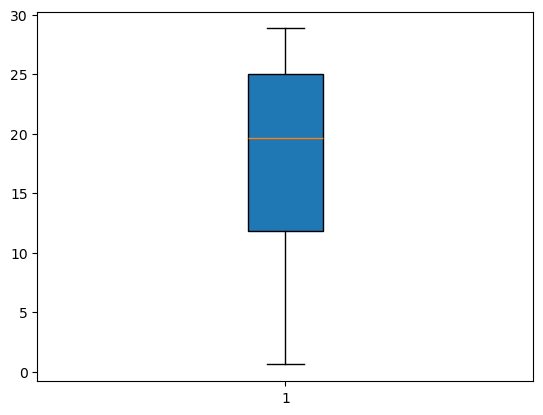


=== Analysis for AQI ===
mean: 53.156716417910445
median: 50.0
mode: 40
std: 21.146767639954458
vars: 447.185781618225
range: 119
iqr: 27.25
Skew: Right-Skewed (positive skew)
count: 134


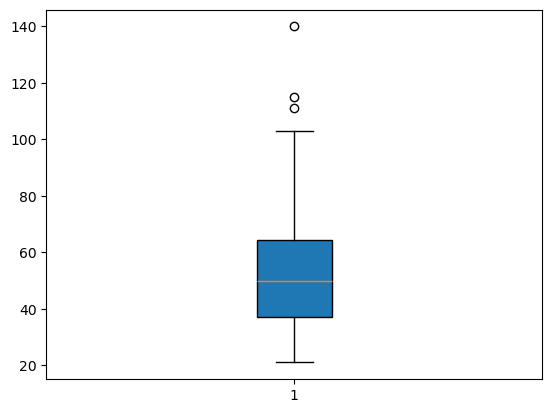


=== Analysis for HDI ===
mean: 0.7679776119402987
median: 0.7915000000000001
mode: 0.72
std: 0.14933750776121002
vars: 0.022301691224329467
range: 0.556
iqr: 0.23524999999999996
Skew: Left-Skewed (negative skew)
count: 134


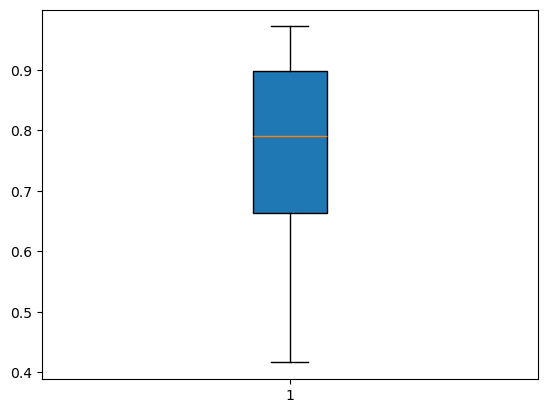


=== Analysis for GDP ===
mean: 21773.838867537317
median: 14554.52
mode: 717.22845
std: 21874.234491382696
vars: 478482134.58399636
range: 148453.88155
iqr: 26297.280850000003
Skew: Right-Skewed (positive skew)
count: 134


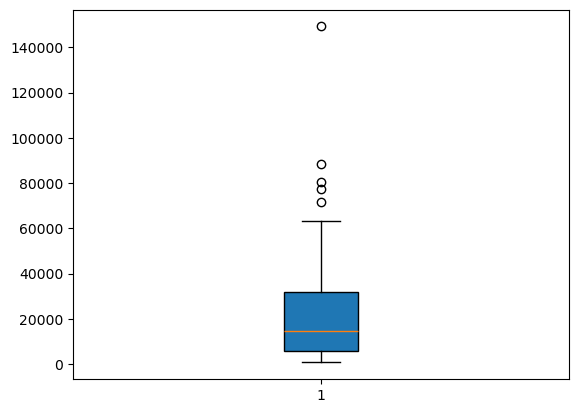


=== Analysis for OADR ===
mean: 16.5364163261194
median: 12.460087000000001
mode: 1.6681604
std: 11.102166543595233
vars: 123.25810196172534
range: 48.2246776
iqr: 19.834452674999998
Skew: Right-Skewed (positive skew)
count: 134


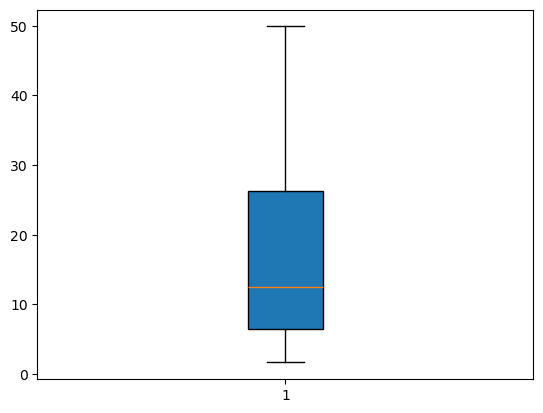


=== Analysis for SR ===
mean: 19.469402985074623
median: 19.55
mode: 8.2
std: 9.391207114608042
vars: 88.19477106946471
range: 41.1
iqr: 14.125000000000002
Skew: Approximately Symmetric
count: 134


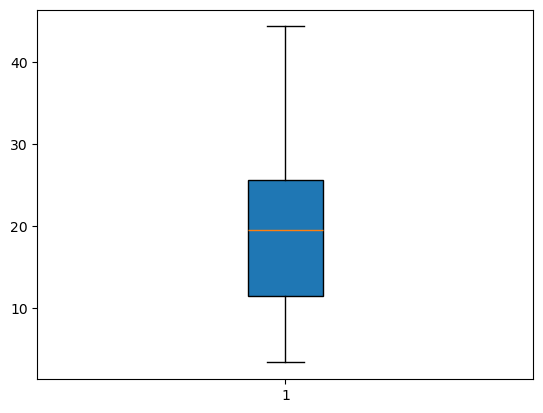


=== Analysis for OOP ===
mean: 34.571608370328356
median: 32.971987119999994
mode: 5.957651431
std: 17.84294726788566
vars: 318.3707672045483
range: 72.290075839
iqr: 27.271368085000002
Skew: Approximately Symmetric
count: 134


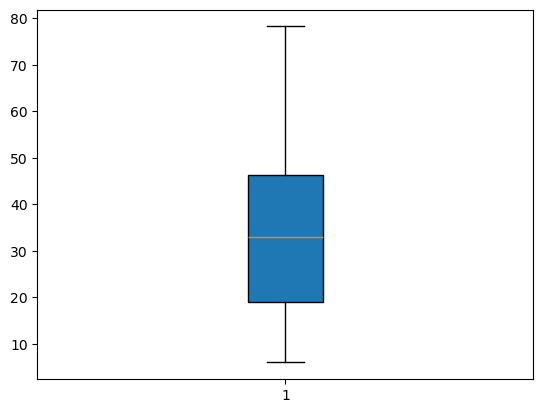


=== Analysis for PDPC ===
mean: 6397.198544776119
median: 6051.5593499999995
mode: 573.0
std: 2953.7163675962847
vars: 8724440.38020619
range: 18287.463
iqr: 3586.1036250000006
Skew: Right-Skewed (positive skew)
count: 134


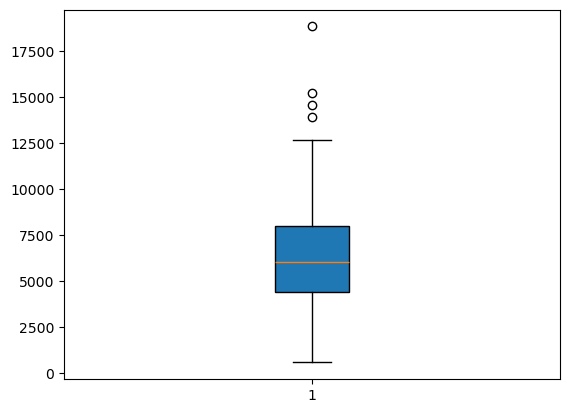


=== Analysis for CO2 ===
mean: 4.708568494776119
median: 3.43966415
mode: 0.05184301
std: 5.510839091728799
vars: 30.369347494926288
range: 38.79016399
iqr: 5.0737336
Skew: Right-Skewed (positive skew)
count: 134


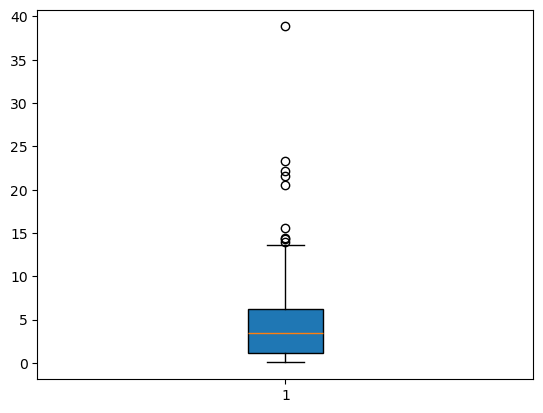


=== Analysis for HUM ===
mean: 66.11373134328359
median: 69.075
mode: 26.32
std: 13.35621764880193
vars: 178.38854988216815
range: 58.4
iqr: 15.769999999999996
Skew: Left-Skewed (negative skew)
count: 134


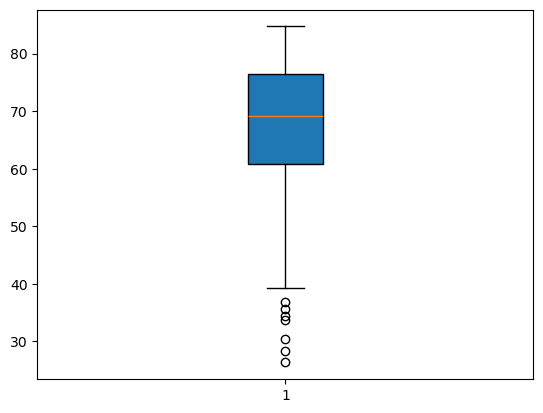


=== Analysis for LCR_OR ===
mean: 13.879644187567163
median: 12.486114635
mode: 1.635326074
std: 9.73858418680234
vars: 94.84002196343658
range: 39.165412576
iqr: 16.951997014249997
Skew: Approximately Symmetric
count: 134


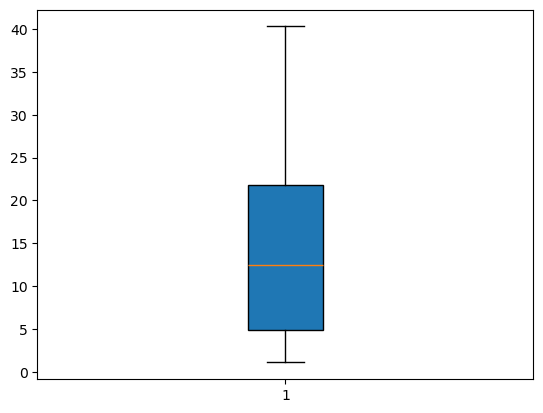

In [6]:
# Model Evaluation
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    """
    Calculate the R^2 score
    Formula: 1- ssres/sstot
    """
    ymean: np.ndarray = np.mean(y)
    diff: np.ndarray = y - ymean #(y - ybar)
    sstot: np.ndarray = np.matmul(diff.T, diff) # (y - ybar)^2
    error: np.ndarray = y - ypred # (y - yhat)
    ssres: np.ndarray = np.matmul(error.T, error) # (y - yhat)^2
    return 1 - np.squeeze(ssres/sstot) # remember to squeeze the value out of the matrix form because r^2 is a scalar, not a 1-element vector [[r^2]] 

def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    """
    Calculate the Mean Squared Error
    Formula: 1/n * Sum((y-yhat)^2)
    """
    n: int = target.shape[0] # number of data points 
    error = target - pred #(y - yhat)^2
    error_sq = np.matmul(error.T, error)
    return 1/n * np.squeeze(error_sq)

# Descriptive Statistics
def calc_stats(data: pd.DataFrame) -> dict[str, Any]:
    """
    Calculate statistics for a dataframe, and export it as a dictionary
    """
    # Central Tendancy
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0] if not data.mode().empty else np.nan # Mode might not always exist!

    # Variability
    std = data.std()
    variance = data.var()
    range_val = data.max() - data.min()

    # Others
    skew = data.skew()
    iqr = data.quantile(0.75) - data.quantile(0.25)

    return {
        'mean': mean,
        'median': median,
        'mode': mode,
        'std': std,
        'vars': variance,
        'range': range_val,
        'iqr': iqr,
        'skew': skew,
        'count': len(data)
    }

def print_statistics(df: pd.DataFrame, columns: list[str]) -> None:
    """
    Print statistics for every column of a dataframe
    """
    for col in columns:
        print(f"\n=== Analysis for {col} ===")
        stats = calc_stats(df[col]) # Calculate stats for every column
        for key, value in stats.items():
            # Different skew interpretions
            if (key == 'skew'):
                if abs(value) < 0.5:
                    print("Skew: Approximately Symmetric")
                elif value < -0.5:
                    print("Skew: Left-Skewed (negative skew)")
                else:
                    print("Skew: Right-Skewed (positive skew)")

            else: # Simply print out values
                print(f"{key}: {value}")

        # Finally, show boxplot
        plt.boxplot(df[col], patch_artist=True)
        plt.show()

columns = ALL_FEATURES + [TARGET]
print_statistics(df, columns)

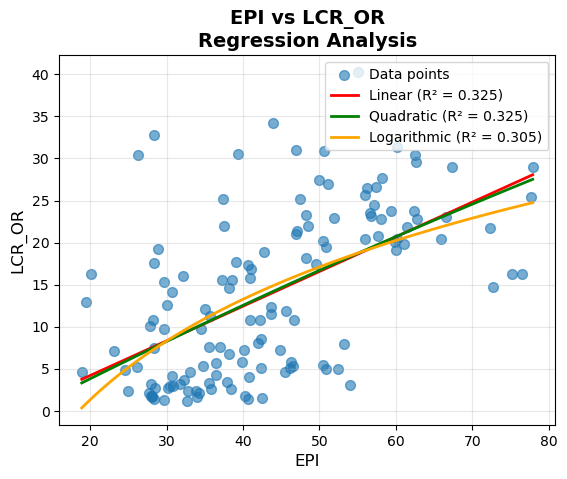

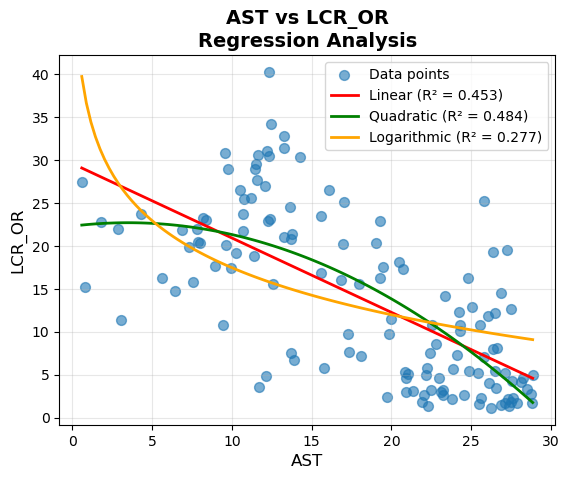

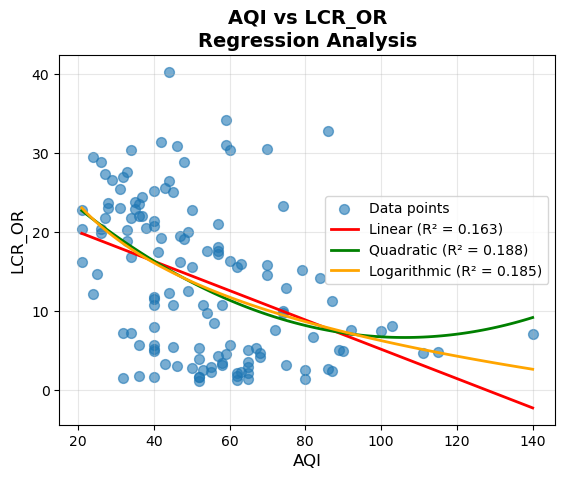

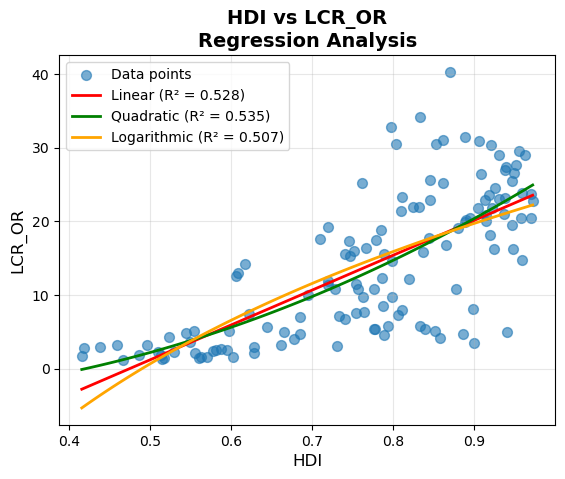

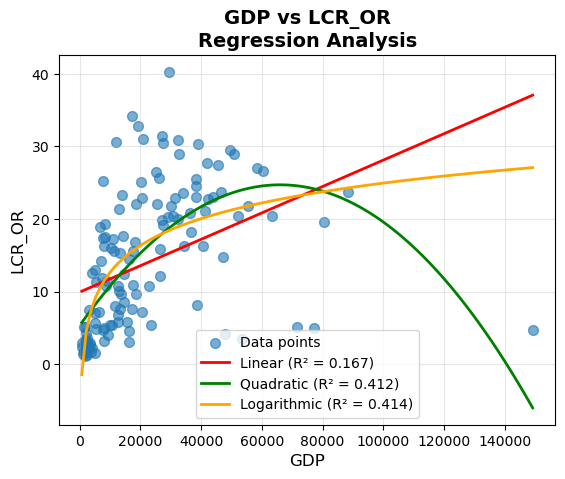

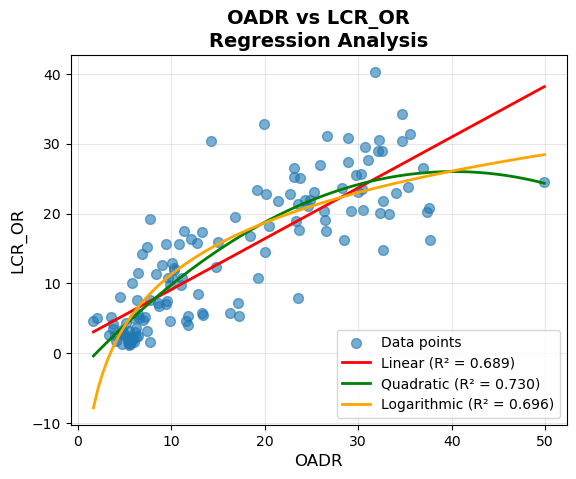

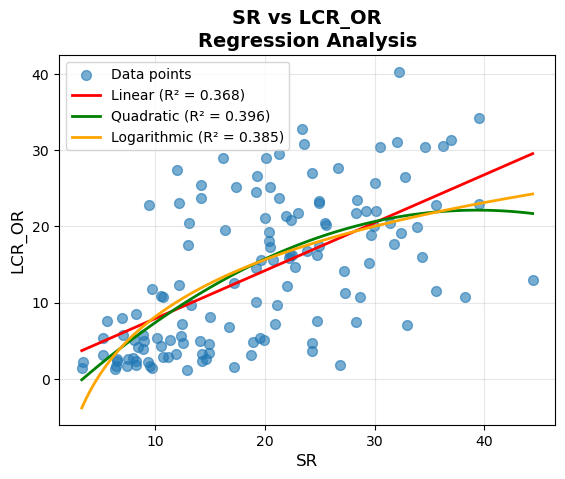

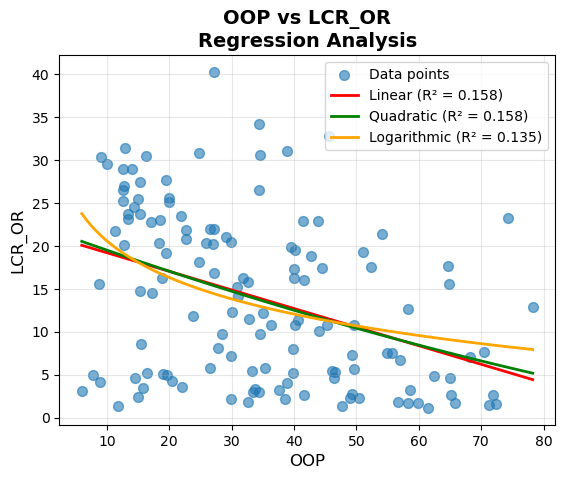

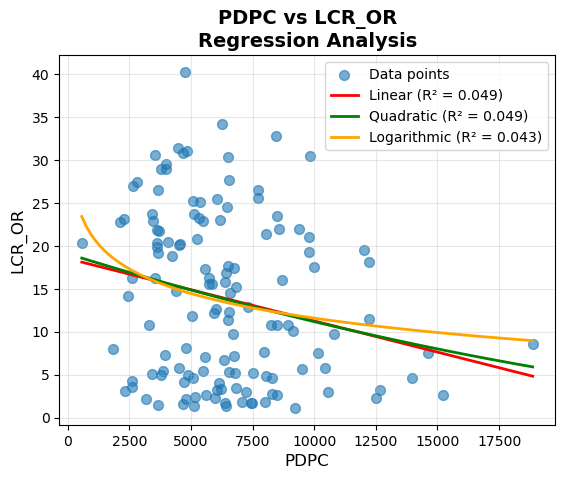

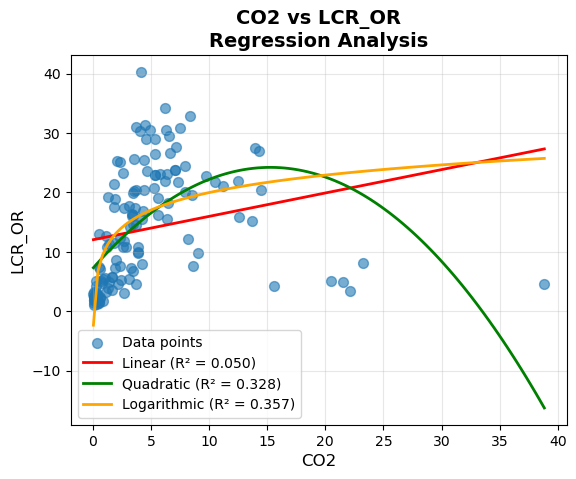

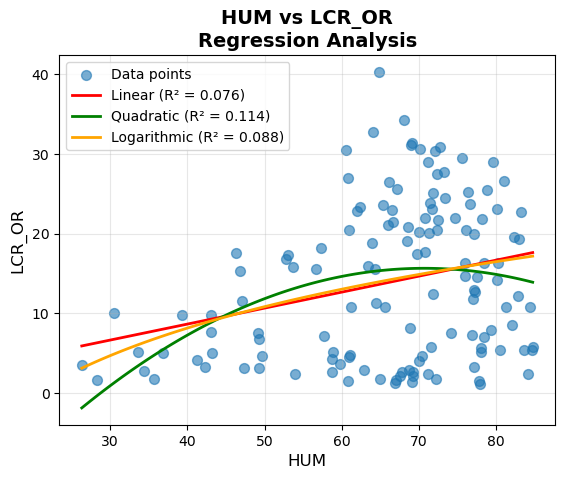

In [7]:
# visualization
def create_scatterplots(df_feature: pd.DataFrame, df_target: pd.DataFrame, feature: str, target: str):
    """
    Create scatter plots with estimated trend lines and R^2 values.
    This is to help us see whether a column should have their data transformed!
    """
    x = df_feature[feature]
    y = df_target[target].loc[x.index]

    # Fit regression transformations
    models = fit_multiple_models(x, y)

    # Create scatter plot
    plt.scatter(x, y, alpha=0.6, s=50, label='Data points')

    # Plot trendlines
    x_smooth = np.linspace(x.min(), x.max(), 100)

    for (model_name, model_info) in models.items():
        match model_name:
            case 'Linear':
                color = 'red'
                y_smooth = np.polyval(model_info['coeffs'], x_smooth)

            case 'Quadratic':
                color = 'green'
                y_smooth = np.polyval(model_info['coeffs'], x_smooth)

            case 'Logarithmic':
                color = 'orange'
                y_smooth = np.polyval(model_info['coeffs'], np.log(x_smooth))
        
        plt.plot(x_smooth, y_smooth, color=color, linewidth=2, 
                label=f'{model_name} (R² = {model_info["r2"]:.3f})')
        
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.title(f'{feature} vs {target}\nRegression Analysis', fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

def fit_multiple_models(x: np.ndarray, y: np.ndarray) -> dict[str, dict]:
    """
    Fit multiple transformed data transformations and return their parameters and R^2
    """
    models = {}

    # Linear model: y = ax + b
    linear_coeffs = np.polyfit(x, y, 1)
    linear_pred = np.polyval(linear_coeffs, x)
    models['Linear'] = {
        'coeffs': linear_coeffs,
        'r2': r2_score(y.values, linear_pred),
    }
    
    # Quadratic model: y = ax^2 + bx + c
    quad_coeffs = np.polyfit(x, y, 2)
    quad_pred = np.polyval(quad_coeffs, x)
    models['Quadratic'] = {
        'coeffs': quad_coeffs,
        'r2': r2_score(y.values, quad_pred),
    }
    
    # Logarithmic model: y = a*ln(x) + b (only if all x > 0)
    if np.all(x > 0):
        log_x = np.log(x)
        log_coeffs = np.polyfit(log_x, y, 1)
        log_pred = np.polyval(log_coeffs, log_x)
        models['Logarithmic'] = {
            'coeffs': log_coeffs,
            'r2': r2_score(y.values, log_pred),
        }
    
    return models

for feature in ALL_FEATURES:
    create_scatterplots(df_feature, df_target, feature, TARGET)

From this, we can see that the following variables perform better when transformed to Quadratic:
- AST
- AQI
- HDI
- OADR
- SR
- HUM

We also see that some variables have a very high variance and a lot of outliers, so we shall remove them from our features:
- CO2
- GDP

In [8]:
cleaned_features = ALL_FEATURES[:]
cleaned_features.remove("CO2")
cleaned_features.remove("GDP")

In [9]:
def transform_features(df_feature: pd.DataFrame, quadratic_cols: list[str]):
    """
    Returns a copy of df_feature with specific columns transformed quadratically
    """
    df_feature_transformed = df_feature.copy()
    for column in quadratic_cols:
        if column not in df.columns:
            continue

        df_feature_transformed[column] = df_feature[column] ** 2

    return df_feature_transformed

df_feature_cleaned = transform_features(df_feature, ["AST", "AQI", "HDI", "OADR", "SR", "HUM"])

### Features and Target Preparation

Prepare features and target for model training.

In [10]:
# Prepare features & target
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    # Get the number of rows
    m: int = np_feature.shape[0]
    
    # Create an array of 1s, with shape of m rows and 1 column
    ones_array = np.ones((m, 1))
    
    # Add column of constant 1s in first column
    X:np.ndarray = np.concatenate((ones_array, np_feature), axis = 1) # axis = 1 is to concatenate column wise
    return X

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_proportion: float=0.3) -> dict[str, pd.DataFrame]:
    indexes: pd.Index = df_feature.index

    # Just to 'predict' randomness for autograder tests (if any) 
    if random_state != None:
        np.random.seed(random_state) 
    
    # Find indexes of the [Test] data set
    test_size: int = int(test_proportion * len(indexes))
    test_indexes = np.random.choice(indexes, test_size, replace=False)

    # [Training] data set will be the remainining indexes
    train_indexes = indexes.drop(test_indexes)
    
    # Create the dataframe of feature & target for each set (train & test)
    df_feature_train: pd.DataFrame = df_feature.loc[train_indexes, :]  
    df_feature_test: pd.DataFrame  = df_feature.loc[test_indexes, :]
    df_target_train: pd.DataFrame = df_target.loc[train_indexes, : ]
    df_target_test: pd.DataFrame = df_target.loc[test_indexes, :]
    
    # Return dictionary of dataframes
    return {"train_features": df_feature_train, "test_features": df_feature_test, "train_target": df_target_train, "test_target": df_target_test}

# (2) Split the data set into training, test & validation dataset
# We shall use a static random_state for now so that we can compare r score values later!
data = split_data(df_feature_cleaned, df_target, random_state=100)

### Building Model

Use python code to build your model. Give explanation on this process.

In [11]:
def build_model_linreg(df_feature_train: pd.DataFrame,
                       df_target_train: pd.DataFrame,
                       beta: Optional[np.ndarray] = None,
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], np.ndarray]:
    # Check if initial beta values are given
    if beta is None: 
        beta = np.zeros((df_feature_train.shape[1]+1, 1)) # Add one dimension to the feature_train array because of the b0 coefficient 
    assert beta.shape == (df_feature_train.shape[1]+1, 1) # To make sure if beta argument is given, then it conforms to the shape of the feature train

    # (1): Dataset Preparation
    # Normalize the features
    array_feature_train_z, means, stds = normalize_z(df_feature_train.to_numpy())

    # (2): Use Linear Regression
    # Prepare the X matrix and the target vector as ndarray 
    X: np.ndarray = prepare_feature(array_feature_train_z)
    target: np.ndarray = df_target_train.to_numpy()
    
    # (3) Perform gradient descent
    beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)
    
    # (4) Store the output in model dictionary 
    model = {"beta": beta, "means":means, "stds": stds}

    # assert the shapes 
    assert model["beta"].shape == (df_feature_train.shape[1] + 1, 1) # make sure that beta vector is d by 1 
    assert model["means"].shape == (1, df_feature_train.shape[1]) # make sure that the means vector is also d-1 by 1 (1 per feature)
    assert model["stds"].shape == (1, df_feature_train.shape[1])  # make sure that the stds vector is also d-1 by 1 (1 per feature)
    assert J_storage.shape == (iterations, 1) # make sure we have recorded #iterations of error
    return model, J_storage

def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray, 
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    # find size of data points
    m: int = X.shape[0]
    
    # create an array to store error value J at each iteration
    # it is an num_iters of gd x 1 vector
    J_storage: np.ndarray = np.zeros((num_iters, 1))
    for n in range(num_iters):
        # Eqn: beta1 = beta - (alpha) * (1/m) * (yhat - y) * X
        # (1) Compute derivative of error with this current beta
        yhat = calc_linreg(X, beta)
        # don't forget that matmul here "loops" through ALL m datapoints in the train set
        deriv: np.ndarray = np.matmul(X.T, (yhat - y)) # (yhat - y) * X
        
        # (2) Update the beta to be new beta
        beta = beta - alpha * (1/m) * deriv 
        
        # (3) Compute error value with this new beta
        J_storage[n] = compute_cost_linreg(X, y, beta)

    assert beta.shape == (X.shape[1], 1) # beta is a column vector 
    assert J_storage.shape == (num_iters, 1) 
    return beta, J_storage

# yhat = b0hat + b1hat * x
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    """
    Calculates linear regression\n
    Formula: yhat = b0hat + b1hat * x

    Returns:
        np.ndarray: result
    """
    result = np.matmul(X, beta)

    # we need to make sure that the shape of the result array tallies with X 
    # if we have N data points in the dataset, then the result array should have N x 1 dimension 
    assert result.shape == (X.shape[0], 1)
    return result

# J(B0, B1) = 1/2m * error_sq
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    m: int = X.shape[0] # get the number of data in the dataset 
    predicted_y = calc_linreg(X, beta) # Linear Regression value -> yhat
    error = predicted_y - y  # this is error is a vector of shape m by 1 -> yhat - y
    
    # eg: error is [1 2 3] --> we want 1^2 + 2^2 + 3^2
    # we can do matmul: [[1 2 3]] ( 1 row 3 columns)  matmul  [1 2 3] (3 rows, 1 col) --> result is 1 row 1 col , e.g: [[14]]
    error_sq = np.matmul(error.T, error)
    J: np.ndarray = (1/(2*m)) * error_sq
    assert J.shape == (1,1) # 1 row 1 column 
    
    # we want to return scalar, so we need to take out the content of J
    return np.squeeze(J) # Same as J[0][0] -> returns axes in array with size 1, eg [[1]] -> [1]

# (3) Build model
model, J_storage = build_model_linreg(data["train_features"], data["train_target"])


### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

In [12]:
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    assert means is None or means.shape == (1, array_feature.shape[1])
    assert stds is None or stds.shape == (1, array_feature.shape[1])
    
    norm_data, _, _ = normalize_z(array_feature, means, stds) # (1) Standardize the feature using z-normalization
    X: np.ndarray = prepare_feature(norm_data) # (2) Change to Numpy array & add column of constant 1s
    result = calc_linreg(X, beta) # (3) Predict y values
    
    assert result.shape == (array_feature.shape[0], 1) # assert that the result vector is m by 1, where m is # data points
    return result

# (4) Now try predicting with [Test] dataset!
pred = predict_linreg(data["test_features"].to_numpy(), model["beta"], model["means"], model["stds"])

# (5) Evaluate model
target: np.ndarray = data["test_target"].to_numpy()
r2: float = r2_score(target, pred)
mse: float = mean_squared_error(target, pred)

print(f"Model: {model}")
print(f"R2: {r2}, MSE: {mse}")

Model: {'beta': array([[13.71688297],
       [-1.59619425],
       [-1.8409884 ],
       [-1.28126618],
       [ 3.55216069],
       [-0.48635785],
       [ 2.2562702 ],
       [ 3.06225572],
       [-1.20946593],
       [ 0.0867903 ],
       [-0.18123923],
       [ 0.8866769 ]]), 'means': array([[4.30893617e+01, 3.87517876e+02, 3.38012766e+03, 6.08873096e-01,
        2.09106063e+04, 4.00545659e+02, 4.69654043e+02, 3.55135789e+01,
        6.28659029e+03, 4.79214010e+00, 4.35678451e+03]]), 'stds': array([[1.33338592e+01, 2.64673301e+02, 3.07046453e+03, 2.15288625e-01,
        1.88840021e+04, 4.72814903e+02, 4.03359528e+02, 1.82747401e+01,
        2.66070582e+03, 5.04767872e+00, 1.62355166e+03]])}
R2: 0.685872137442324, MSE: 32.543191412018956


**Current R2:** 0.678

### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

First, to make things easier such that we don't need to keep copying code, let's create a function that builds a model based on our list of features, and prints the R-score and MSE

In [44]:
def build_model_with_features(df: pd.DataFrame, features: list[str], target: str):
    # (1) Extract the feature and the target
    df_features, df_target = get_features_targets(df, features, target)

    # (2) Split the data set into training, test & validation dataset
    data = split_data(df_features, df_target, random_state=100)

    # (3) Build model
    model, _ = build_model_linreg(data["train_features"], data["train_target"])

    # (4) Now try predicting with [Test] dataset!
    pred = predict_linreg(data["test_features"].to_numpy(), model["beta"], model["means"], model["stds"])

    # Change target test set to a numpy array
    target: np.ndarray = data["test_target"].to_numpy()

    # Calculate r2 score by calling a function
    r2: float = r2_score(target, pred)
    mse: float = mean_squared_error(target, pred)
    print(f"{feature}: R2: {r2} | MSE: {mse}")
    return model, r2, mse

Since we have a lot of features, we wanted to eliminate some that worsen the accuracy of our model.
To do so, we tried to build a "regression model" that contains just **one** of each variables, to check their R-score.
While this may not be as accurate to determine the actual contribution to the model, it serves as a good estimate, and we simply just removed the **negative scores** from the features.

In [ ]:
for index, feature in enumerate(cleaned_features):
    build_model_with_features(df, feature, TARGET)

EPI: R2: 0.3450718339257821 | MSE: 67.84960906090436
AST: R2: 0.4827583802297819 | MSE: 53.585482361833925
AQI: R2: 0.20398403193984693 | MSE: 82.46610092044546
HDI: R2: 0.5997693992281417 | MSE: 41.463310334257564
OADR: R2: 0.7281292518863445 | MSE: 28.16541558317519
SR: R2: 0.17953087707391413 | MSE: 84.99941233367193
OOP: R2: 0.154343439178119 | MSE: 87.60879440486818
PDPC: R2: 0.006917439297651873 | MSE: 102.88191438268433


From the above we found that the following features have a negative R-score, and thus eliminated them:
- HUM

In [ ]:
if "HUM" in cleaned_features:
    cleaned_features.remove("HUM")
build_model_with_features(df, cleaned_features, TARGET)

PDPC: R2: 0.7510428647399657 | MSE: 25.791598491737204


(0.7510428647399657, 25.791598491737204)

Nice! Our R-score value improved to
0.7538

But we can do better! What if we automate this?
To do so, we decided to utilize a validation dataset, so let's modify the original splitting code to account for this

In [27]:
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_proportion: float=0.3, valid_proportion: float=0.3) -> dict[str, pd.DataFrame]:
    indexes: pd.Index = df_feature.index

    # Just to 'predict' randomness for autograder tests (if any) 
    if random_state != None:
        np.random.seed(random_state) 
    
    # Find indexes of the [Test] data set
    test_size: int = int(test_proportion * len(indexes))
    test_indexes = np.random.choice(indexes, test_size, replace=False)
    
    # find the indexes that are not selected by the test index
    removed_indexes = indexes.drop(test_indexes)

    # Find indexes of the [Validation] data set
    valid_size: int = int(valid_proportion * len(indexes))
    valid_indexes = np.random.choice(removed_indexes, valid_size, replace=False)

    # [Training] data set will be the remainining indexes
    train_indexes = removed_indexes.drop(valid_indexes)
    
    # time to create the dataframe of feature & target for each set (train & test)
    df_feature_train: pd.DataFrame = df_feature.loc[train_indexes, :]  
    df_feature_test: pd.DataFrame  = df_feature.loc[test_indexes, :]
    df_feature_valid: pd.DataFrame = df_feature.loc[valid_indexes, :]
    df_target_train: pd.DataFrame = df_target.loc[train_indexes, : ]
    df_target_test: pd.DataFrame = df_target.loc[test_indexes, :]
    df_target_valid: pd.DataFrame = df_target.loc[valid_indexes, :]
    
    return {"train_features": df_feature_train, "test_features": df_feature_test, "valid_features": df_feature_valid, "train_target": df_target_train, "test_target": df_target_test, "valid_target": df_target_valid}

Now, to automate this, we decided to use code to first generate every possible combination of the features.

In [28]:
def combinations(iterable, r):
    """
    Source: https://docs.python.org/3/library/itertools.html#itertools.combinations
    Return r length subsequences of elements from the input iterable. 
    
    Examples:
    combinations('ABCD', 2) → AB AC AD BC BD CD
    combinations(range(4), 3) → 012 013 023 123
    """
    pool = list(iterable)
    n = len(pool)
    if r > n:
        return
    indices = list(range(r))

    yield list(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            return
        indices[i] += 1
        for j in range(i+1, r):
            indices[j] = indices[j-1] + 1
        yield list(pool[i] for i in indices)

def get_all_feature_combinations(features: pd.DataFrame) -> list[str]:
    """
    Get all possible combinations of feature names
    """
    all_combis = []
    for i in range(1, len(features) + 1):
        for combo in list(combinations(features, i)):
            all_combis.append(combo)

    return all_combis

With this, we shall use the validation data set to loop through every combination of features to build the best model!

In [39]:
def build_model_with_validation(data: dict[str, pd.DataFrame],
                       feature_names: list[str],
                       alpha: float = 0.01,
                       iterations: int = 1500) -> tuple[dict[str, Any], list[str], dict[str, Any]]:
    """
    Trains the model with different features and use validation set to select the best ones

    Returns:
        tuple containing:
            - best_model (dictionary): Contains "beta", "means", "std" arrays
            - best_features (array): Best combination of features
    """
    best_model = {}
    best_features = []
    best_cost = np.inf
    all_combis = get_all_feature_combinations(feature_names)

    # Loop through every combination of features to build the best model!
    for features in all_combis:
       # (1) Extract the features for training & validation
       # Data was already split previously, so we're just taking a "subset" with the new feature combinations
        df_feature_train: pd.DataFrame = data["train_features"][features]
        df_feature_valid: pd.DataFrame = data["valid_features"][features]

        # (2) Splitting was already done in previous stage

        # (3) Build model
        model, _ = build_model_linreg(df_feature_train, data["train_target"], alpha=alpha, iterations=iterations)
        
        # (4) Evaluate model
        evaluation = evaluate_model(model, df_feature_valid, data["valid_target"])

        # ! UNCOMMENT ME TO CHECK PROGRESS!
        # ! Commented out just for Vocareum
        # print(f"Model: {features} | {evaluation}")

        if (evaluation["cost"] < best_cost):
            best_cost = evaluation["cost"]
            best_features = features
            best_model = model

    return best_model, best_features

def evaluate_model(model: dict[str, Any], valid_features: np.ndarray, valid_target: np.ndarray) -> dict[str, float]:
    """
    Evaluates model with validation dataset

    Returns:
        dict[str, float]: Dictionary with metrics containing:
            - cost: J score
            - r2
            - mse
    """
    # (1) Prepare X matrix with bias term
    valid_normalised, _, _ = normalize_z(valid_features, model["means"], model["stds"])
    x_valid = prepare_feature(valid_normalised)

    # (2) Calculate validation cost (J score!)
    validation_cost = compute_cost_linreg(x_valid, valid_target, model["beta"])

    # (3) Calculate other metrics
    valid_pred = predict_linreg(valid_features, model["beta"], model["means"], model["stds"])
    r2 = r2_score(valid_target, valid_pred)
    mse = mean_squared_error(valid_target, valid_pred)

    return {
        "cost": validation_cost,
        "r2": r2,
        "mse": mse
    }

Now to run these functions!
> WARNING: As we're looping through every combination, this is quite heavy! Recommended to do this in VSCode instead of inside Vocareum. It'll take a while!

In [ ]:
def run_model_features_validation():
    df: pd.DataFrame = pd.read_csv(FILE_NAME)

    # (1) Extract the features and the target
    df_features, df_target = get_features_targets(df, ALL_FEATURES, TARGET)

    # (2) Split the data set into training and test
    data = split_data(df_features, df_target, random_state=100)

    # (3) Build model
    model, best_features = build_model_with_validation(data, ALL_FEATURES)

    # (4) Now try predicting with [Test] dataset!
    pred = predict_linreg(data["test_features"][best_features].to_numpy(), model["beta"], model["means"], model["stds"])
    target: np.ndarray = data["test_target"].to_numpy()

    # Calculate metrics
    r2: float = r2_score(target, pred) 
    mse: float = mean_squared_error(target, pred)

    print(f"{best_features}: R2: {r2} | MSE: {mse}")

run_model_features_validation()

['EPI', 'AST', 'AQI', 'HDI', 'GDP', 'OADR', 'SR', 'OOP', 'CO2']: R2: 0.7476148057732236 | MSE: 26.14674043367779


Wait what?! Our R-score went down!
It's now 0.747 now! ☹️

This is a classic case of **overfitting** the validation dataset, even though these variables performed better during the validation stage, it got worse during the training stage!

It appears that adding extra features introduced unnecessary complexity.
To combat this, we shall modify the `evaluation["cost"] < best_cost` line to only increase the model's complexity if there's a **significant improvement** from the previous level.
`

In [43]:
def build_model_with_validation(data: dict[str, pd.DataFrame],
                       feature_names: list[str],
                       alpha: float = 0.01,
                       iterations: int = 1500,
                       min_improve_threshold: float = 0.03) -> tuple[dict[str, Any], list[str], dict[str, Any]]:
    """
    Trains the model with different features and use validation set to select the best ones

    Returns:
        tuple containing:
            - best_model (dictionary): Contains "beta", "means", "std" arrays
            - best_features (array): Best combination of features
    """
    best_model = {}
    best_features = []
    best_cost = np.inf
    all_combis = get_all_feature_combinations(feature_names)

    # Loop through every combination of features to build the best model!
    for features in all_combis:
       # (1) Extract the features for training & validation
       # Data was already split previously, so we're just taking a "subset" with the new feature combinations
        df_feature_train: pd.DataFrame = data["train_features"][features]
        df_feature_valid: pd.DataFrame = data["valid_features"][features]

        # (2) Splitting was already done in previous stage

        # (3) Build model
        model, _ = build_model_linreg(df_feature_train, data["train_target"], alpha=alpha, iterations=iterations)
        
        # (4) Evaluate model
        evaluation = evaluate_model(model, df_feature_valid, data["valid_target"])

        # ! UNCOMMENT ME TO CHECK PROGRESS!
        # ! Commented out just for Vocareum
        #print(f"Model: {features} | {evaluation}")

        # To prevent overfitting validation data & adding unnecessary complexity,
        # we only add additional complexity from the previous features if the improvement is over the desired amount
        # previously just: evaluation["cost"] < best_cost
        if ((evaluation["cost"] < best_cost and len(features) <= len(best_features)) \
            or (evaluation["cost"] < best_cost * (1 - min_improve_threshold))):
            best_cost = evaluation["cost"]
            best_features = features
            best_model = model

    return best_model, best_features

run_model_features_validation()

['EPI', 'AST', 'AQI', 'HDI', 'OADR', 'SR', 'OOP']: R2: 0.7544453034327341 | MSE: 25.43911077305836


Awesome! With that, we have our final R2 value of:
**0.754**

Now let's clean up the features and get the model beta values.

In [45]:
cleaned_features = ['EPI', 'AST', 'AQI', 'HDI', 'OADR', 'SR', 'OOP']
model, _, _ = build_model_with_features(df, feature, TARGET)

print(f"BETA: {model["beta"]}")
print(f"MEANS: {model["means"]}")
print(f"STDS: {model["stds"]}")

PDPC: R2: 0.006917439297651873 | MSE: 102.88191438268433
BETA: [[13.93078888]
 [-2.99221951]]
MEANS: [[5969.93737222]]
STDS: [[2399.73088933]]


We plug these values into our `constants.py` to use for our webpage and that's it!
The following is just a wrapper class that shows how we utilised this model in our website.

In [ ]:
from constants import BETA, MEANS, STDS
def get_country_variable(country: str, variable: str = "LCR"):
    country_row = df.loc[df['Country'] == country]
    return float(country_row[variable].iloc[0])

def get_variable_median(variable: str):
    row = df[variable]
    return row.median()

def get_or_from_ancestry(ancestry: str):
    if (ancestry is None):
        return 1
    
    ancestry_row = or_df.loc[or_df['ANC'] == ancestry.capitalize()]
    return float(ancestry_row["OR"].iloc[0])

class LungCancerPredictor:
    def __init__(self, inputs: dict[str, float]):
        features = {}
        for key, value in inputs.items():
            if (key != "ANC"):
                features[key] = value if value != None else get_variable_median(key)

        self.features = pd.Series(features).to_frame().T # Convert dictionary to series as a row
        self.features = self.features[cleaned_features] # Reorder features to match training data
        self.or_value = get_or_from_ancestry(inputs["ANC"])

    def predict_lcr(self):
        # Remember this gives us LCR_OR!
        pred = predict_linreg(self.features.to_numpy(), BETA, MEANS, STDS)

        # Need to multiply back to get raw LCR value
        return  np.squeeze(pred) * self.or_value

As the comments mention, remember that we are only predicting Lung Cancer Rates **per Odd Ratio**. 

So, to get the final **raw** LCR, we include 1 more input from the front-end side `"ANC" - Ancestry` which is mapped to a certain OR value from our `OddsRatio_Data.csv` file.

We then multiply this back to get the raw value and that's it!

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion

Overall, our metrics produce a risk indicator via A Regression model that ingests various inputs from our model, evaluates its performance using key metrics, and R^2 = 0.754, suggesting that it explains approximately XX% of the variance in national respiratory disease. The MSE = 25.4 indicates that our model predictions are reasonably close to the actual values. From our metrics, it has proven that some parts of our hypothesis in initial variables that were thought to have a relationship did not have a strong relationship or linearity, which led to us to remove certain variables to aim for optimal r^2 values; GDP.

Our problem statement, 'How might we guide policymakers to preemptively mitigate the risk of developing respiratory disease by pinpointing critical areas of improvement?' is addressed in our model by quantifying risks as measurable indicators, identifying key drivers, analyzing the model's coefficients, and providing actionable insights that could help prioritize interventions. 

In conclusion, This project demonstrates how machine learning can convert multi-dimensional health and environmental data into actionable insights for public health planning. By simplifying complex relationships between socio-environmental factors and respiratory disease burden, our model empowers decision-makers to compare countries' risk scores with objective benchmarks, identify impactful levers (e.g., improving air quality or investing in healthcare), Customizing national strategies for prevention.

Ultimately, our solution, LUCIA bridges the gap between data availability and real-world action, offering a practical tool for reducing health risks in a targeted, evidence-based way.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1934b37b-c3f1-43fc-9f7b-31541250e421' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>